## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [93]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [94]:
#import the dataset
df = pd.read_csv('ab_data.csv')
#first 5 rows of dataset
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [95]:
#the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [96]:
#the number of unique user_id in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [97]:
#the proportion of users converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [98]:
#the treatment and not new_page 
df_tre=df.query('group=="treatment" and landing_page!="new_page"')
#the control and not old_page
df_con=df.query('group=="control" and landing_page!="old_page"')
#the number of times of (the new_page and treatment ) & (the old_page and control) do not match
len(df_tre) + len(df_con)

3893

f. Do any of the rows have missing values?

In [99]:
#view missing value
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [100]:
#treatment and new_page
df3 = df.query('group == "treatment" and landing_page == "new_page"')
df3.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [101]:
#control and old_page
df4 = df.query('group == "control" and landing_page == "old_page"')
df4.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [102]:
#new dataframe of (treatment with new_page) and (control with old_page)

df2=df3.append(df4)
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0
12,803683,2017-01-09 06:05:16.222706,treatment,new_page,0
13,944475,2017-01-22 01:31:09.573836,treatment,new_page,0
14,718956,2017-01-22 11:45:11.327945,treatment,new_page,0


In [103]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [104]:
#unique user_id in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [105]:
#duplicated user_id in df2
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [106]:
#row information for the repeat user_id
df2[df2.duplicated(['user_id'], keep=False)]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


https://stackoverflow.com/questions/43713731/pandas-group-by-id-and-drop-duplicate-with-threshold

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [107]:
#remove duplicated rows
df2.drop(labels=2893, inplace=True)


https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/

In [108]:
#make sure of removing duplicated
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [109]:
#probability of converted
df2.converted.mean()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [110]:
#probability of control group to convert
df2_con=df2.query('group=="control"').converted.mean()
df2_con

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [111]:
#probability of treatment group to convert
df2_treat=df2.query('group=="treatment"').converted.mean()
df2_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [112]:
#probability of received the new page 
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]


0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

THE ANSWER
NO, there is no sufficient evidence to conclude that the new treatment page leads to more conversions 
Because the probability that  the individuals in the `control` group  converted is 12.038%
and the probability that the individuals in the  `treatment` group converted is 11.880%

  

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Answer
Null Hypothesis **$P_{old}$** => **$P_{new}$**
the conversion rate of old page is equal or greater than the conversion rate of new page
Alternative Hypothesis **$P_{old}$** < **$P_{new}$**
the conversion rate of new page is greater than the conversion rate of old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [113]:
#conversion rate for new page 
p_new=df2.converted.mean()
p_new


0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [114]:
#conversion rate for old page
p_old=df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [115]:
#number of individuals in the treatment group
n_new=df2.query('group=="treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [116]:
#number of individuals in the control group
n_old=df2.query('group=="control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [117]:
#simulate n_new with conversion rate under the null
np.random.seed(42)
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, (1-p_new)])
new_page_converted.mean()

0.11979216846741449

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [118]:
#simulate n_old with conversion rate under the null
np.random.seed(42)
old_page_converted=np.random.choice([1,0], size=n_old, p=[p_old, (1-p_old)])
old_page_converted.mean()

0.11980120324352603

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [119]:
#difference between P new and P old 
new_page_converted.mean() - old_page_converted.mean()

-9.0347761115411318e-06

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [120]:
# Create sampling distribution for difference 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
    old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
    p_diffs = new_page_converted - old_page_converted


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [121]:
# convert to numpy array
p_diffs = np.array(p_diffs)

Text(0.5,1,'Simulation under null hypothesis')

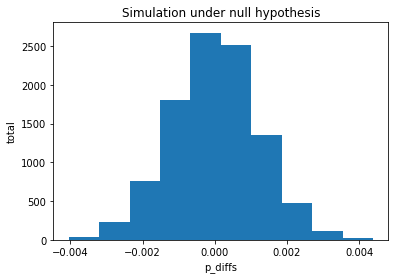

In [122]:
# plot distribution

plt.hist(p_diffs);

plt.xlabel('p_diffs');
plt.ylabel('total');
plt.title('Simulation under null hypothesis')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [123]:
#actual difference observed in ab_data
data_diff = df2_treat - df2_con
data_diff

-0.0015782389853555567

In [124]:
#proportion of the p_diffs are greater than data_diff
(p_diffs > data_diff).mean()


0.90529999999999999

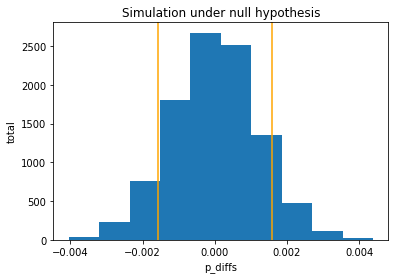

In [125]:
#Simulation under null hypothesis
plt.hist(p_diffs);
plt.xlabel('p_diffs');
plt.ylabel('total');
plt.title('Simulation under null hypothesis')
plt.axvline(data_diff, color='orange');
plt.axvline(p_diffs.mean() + (p_diffs.mean() - data_diff), color='orange');
plt.legend()


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

ANSWER
the p-value is the probability of getting our statistic or more extreme value if the null is true
small p-values suggest our null is not true, rather, our statistic is likely to have come from a different distribution than the null
when the p-value is large we have evidence that our statistic was likely to come from the null hypothesis, therefore, we do not have evidence to reject the null
Null Hypothesis **$P_{old}$** => **$P_{new}$**
the conversion rate of old page is equal or greater than the conversion rate of new page


90.42% is the proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv.

when the p-value is large we have evidence that our statistic was likely to come from the null hypothesis, therefore, we do not have evidence to reject the null



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [126]:
import statsmodels.api as sm

convert_old =df2.query('landing_page=="old_page"').converted.sum() 
convert_new =df2.query('landing_page=="new_page"').converted.sum() 
n_old = df2.query('landing_page=="old_page"').user_id.count() 
n_new = df2.query('landing_page=="new_page"').user_id.count() 
 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [127]:
#ztest test statistic for the z-test
#p-value p-value for the z-test 
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
z_score, p_value


(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

ANSWER

Z score tells how many standard deviations away a data point is from the mean
A z-score describes the position of a raw score in terms of its distance from the mean, when measured in standard deviation units. The z-score is positive if the value lies above the mean, and negative if it lies below the mean.The conversion rate of the new landing page is only 1.3109 standard deviations from the conversion rate of the old landing page
The p_value is 0.90 and is higher than 0.05 significance level. 
We cannot reject the hull hypothesis 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

the type of regression is a logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [128]:
#add categorical variables into model regression
df2[['control','ab_page']]= pd.get_dummies(df2['group'])
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [129]:
#regression model 
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)
df2['intercept'] = 1
lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [130]:
#summary of regression model 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:               8.077e-06
Time:                        00:00:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

ANSWER: The p-value associated with ab_page is 0.190
IN THE PART 2
Null Hypothesis **$P_{old}$** => **$P_{new}$**
the conversion rate of old page is equal or greater than the conversion rate of new page
Alternative Hypothesis **$P_{old}$** < **$P_{new}$**
the conversion rate of new page is greater than the conversion rate of old page
IN THE PART 3
the null hypothesis is  ab_page = 1, converted = 0
the alternative hypothesis is ab_page = 1, converted is more likely to be 1


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

it is a good idea to consider other factors to add into regression model to identify the other factors influence on the individual converts
 disadvantages to adding additional terms into regression model it may make it more complex

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [131]:
#load data of countries.csv 
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [132]:
#add categorical variables into model regression
country_dummies = pd.get_dummies(countries['country'])
df_new = countries.join(country_dummies)
df_new.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [133]:
#join the two dataset by user_id
df2= df2.set_index('user_id').join(df_new.set_index('user_id'))
df2.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US
user_id,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


Set Canada as baseline country

In [134]:
#Impact of country on conversion rate

df2['intercept'] = 1
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:               2.323e-05
Time:                        00:00:07   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The country does not appear to has a significant impact on the convertion rate.
P-values for the country variables are above 0.05.
p-values for UK is 0.074
P-values for US is 0.130




h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [135]:
#interaction between ab_page and country
df2['UK_new'] = df2['UK'] * df2['ab_page']
df2['US_new'] = df2['US'] * df2['ab_page']
df2.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country,CA,UK,US,UK_new,US_new
user_id,,,,,,,,,,,,
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,1
679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0,0,0
817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0,1,0
839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0,0,0


In [136]:
#Set Canada as baseline country
lm=sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'US', 'UK_new', 'US_new']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Mar 2021   Pseudo R-squ.:               3.482e-05
Time:                        00:00:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_new         0.0783      0.057      1.378      0.168      -0.033       0.190
US_new         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

Conclusions
The p-value for ab_page is 0.191.
The p-value for UK is 0.074
The p-value for UK_new is 0.168 
The p-value for US is 0.130
The p-value for US_new	0.383

so the p-value is is higher than 0.05
p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. 
This means we retain the null hypothesis and reject the alternative hypothesis
so the old page is ok and there is no reason to switch to the new page

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [137]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0